In [1]:
import kagglehub
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import sklearn.metrics
import sklearn.linear_model
import sklearn.model_selection
import sklearn.preprocessing

In [2]:
# Download latest Energy Fraud Detection version
path = kagglehub.dataset_download("mrmorj/fraud-detection-in-electricity-and-gas-consumption")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\l.mora\.cache\kagglehub\datasets\mrmorj\fraud-detection-in-electricity-and-gas-consumption\versions\2


In [3]:
columns = [
    'client_id',
    'invoice_date',
    'counter_number',
    'consommation_level_1',
    'consommation_level_2',
    'consommation_level_3',
    'consommation_level_4',
    'months_number'
]
features = [
    'consommation_level_1',
    'consommation_level_2',
    'consommation_level_3',
    'consommation_level_4',
    'months_number'
]
target = 'target'
target_labels = ["No Fraud", "Fraud"]

print(f"Training features:\n\t- {";\n\t- ".join(columns)}.")
print(f"Target variable:\n\t- {target}")

Training features:
	- client_id;
	- invoice_date;
	- counter_number;
	- consommation_level_1;
	- consommation_level_2;
	- consommation_level_3;
	- consommation_level_4;
	- months_number.
Target variable:
	- target


In [4]:
data = pd.read_csv(f"{path}\\invoice_train.csv", low_memory=False)

data = data[data.counter_type == "ELEC"]
data = data[columns]

print(f"Total number of columns for invoice CSV:\t{len(data.columns)}")
print(f"Total number of instances for invoice CSV:\t{len(data)}")
print(f"Invoice CSV column names:\n\t- {";\n\t- ".join(list(data.columns))}.")

Total number of columns for invoice CSV:	8
Total number of instances for invoice CSV:	3079406
Invoice CSV column names:
	- client_id;
	- invoice_date;
	- counter_number;
	- consommation_level_1;
	- consommation_level_2;
	- consommation_level_3;
	- consommation_level_4;
	- months_number.


In [5]:
test_data = pd.read_csv(f"{path}\\invoice_test.csv", low_memory=False)

test_data = test_data[test_data.counter_type == "ELEC"]
test_data = test_data[columns]

print(f"Total number of columns for testing:\t{len(test_data.columns)}")
print(f"Total number of instances for testing:\t{len(test_data)}")
print(f"Test column names:\n\t- {";\n\t- ".join(list(test_data.columns))}.")

Total number of columns for testing:	8
Total number of instances for testing:	1335794
Test column names:
	- client_id;
	- invoice_date;
	- counter_number;
	- consommation_level_1;
	- consommation_level_2;
	- consommation_level_3;
	- consommation_level_4;
	- months_number.


In [6]:
client_data = pd.read_csv(f"{path}\\client_train.csv", low_memory=False)
merged_data = pd.merge(data, client_data[["client_id", "target"]], on="client_id")

print(f"Total number of columns for the merged dataframe:\t{len(merged_data.columns)}")
print(f"Column names of the generated dataframe:\n\t- {";\n\t- ".join(list(merged_data.columns))}.")

Total number of columns for the merged dataframe:	9
Column names of the generated dataframe:
	- client_id;
	- invoice_date;
	- counter_number;
	- consommation_level_1;
	- consommation_level_2;
	- consommation_level_3;
	- consommation_level_4;
	- months_number;
	- target.


In [7]:
train, validation = sklearn.model_selection.train_test_split(merged_data, test_size=.2, random_state=42, shuffle=True)

print(f"Training set instances:\t\t{len(train)}")
print(f"Validation set instances:\t{len(validation)}")

Training set instances:		2463524
Validation set instances:	615882


In [8]:
x_train = train[features].to_numpy()
y_train = train[target].astype("int").astype("category")

In [9]:
x_val = validation[features].to_numpy()
y_val = validation[target].astype("int").astype("category")

In [10]:
scaler = sklearn.preprocessing.StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)

In [11]:
clf = sklearn.linear_model.Perceptron(
    max_iter=3000,
    random_state=42
)
fitted_clf = clf.fit(scaled_x_train, y_train)

In [12]:
y_pred = fitted_clf.predict(scaler.transform(x_val))
res_results = pd.DataFrame({"EXPECTED": y_val, "PREDICTED": y_pred})

In [13]:
res_results.head(15)

,EXPECTED,PREDICTED
448403,0,0
2549765,0,0
2513566,0,0
271804,0,0
140361,0,0
2397231,0,0
543041,0,0
254070,0,0
1638398,0,0
2693182,0,0


In [14]:
fitted_clf.score(x_train, y_train)

0.8406254617369264

In [15]:
fitted_clf.score(x_val, y_val)

0.8400326685956075

In [16]:
confusion_matrix = sklearn.metrics.confusion_matrix(y_val, y_pred)

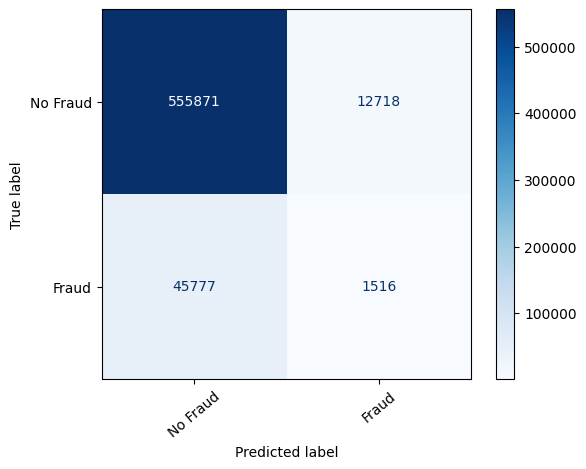

In [17]:
cm_display = sklearn.metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix,
    display_labels=target_labels)

cm_display.plot(
    cmap=plt.cm.Blues, # type: ignore
    xticks_rotation=40
)
plt.show()

In [21]:
avg_metrics = {
    "accuracy": sklearn.metrics.accuracy_score(y_val, y_pred),
    "precision": sklearn.metrics.precision_score(
        y_val, y_pred,
        labels=target_labels),
    "sensitivity": sklearn.metrics.recall_score(
        y_val, y_pred,
        labels=target_labels),
    "f1_score": sklearn.metrics.f1_score(
        y_val, y_pred,
        labels=target_labels)
}

In [19]:
avg_metrics

{'accuracy': 0.9050223906527549,
 'precision': 0.0,
 'sensitivity': 0.0,
 'f1_score': 0.0}

In [20]:
print(sklearn.metrics.classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    No Fraud       0.92      0.98      0.95    568589
       Fraud       0.11      0.03      0.05     47293

    accuracy                           0.91    615882
   macro avg       0.52      0.50      0.50    615882
weighted avg       0.86      0.91      0.88    615882

